In [154]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [2]:
raw_data=pd.read_csv("pacs003.csv")

In [7]:
raw_data.columns

Index(['id', 'received_at', 'sent_at', 'status', 'payload', 'creation_date',
       'route_id', 'operation_type', 'type', 'fk_matching_id', 'reject_rsn',
       'storage_key_file_in'],
      dtype='object')

In [18]:
raw_data.head(5)

,id,received_at,sent_at,status,payload,creation_date,route_id,operation_type,type,fk_matching_id,reject_rsn,storage_key_file_in
0,4554dbf2-1e33-44c8-af75-98b51137640c,2024-09-30 15:14:44.263061,NaN,TR,NaN,2024-09-30 14:14:44.263089,4edb9449-fb37-4ae8-a411-cfbb1490856d,REAL,UNIT,NaN,NaN,NaN
1,57f49898-34bd-4d76-9119-625e79893453,2024-09-30 15:14:44.407839,NaN,TR,NaN,2024-09-30 14:14:44.407986,4edb9449-fb37-4ae8-a411-cfbb1490856d,REAL,UNIT,NaN,NaN,NaN
2,fefabc11-4e99-4bf6-bb55-82cf2e799574,2024-10-31 11:49:59.676704,NaN,ER,NaN,2024-10-31 10:49:59.676706,4edb9449-fb37-4ae8-a411-cfbb1490856d,REAL,UNIT,NaN,NaN,NaN
3,5cebf644-42a0-46dd-b7df-7a5eab657278,2024-10-31 11:54:59.825313,NaN,ER,NaN,2024-10-31 10:54:59.825315,4edb9449-fb37-4ae8-a411-cfbb1490856d,REAL,UNIT,NaN,NaN,NaN
4,7d7a5175-8b9a-4225-8361-b2d0a5d2f250,2024-10-31 11:59:59.954904,NaN,ER,NaN,2024-10-31 10:59:59.954906,4edb9449-fb37-4ae8-a411-cfbb1490856d,REAL,UNIT,NaN,NaN,NaN


In [37]:
n = len(pd.unique(raw_data['route_id']))
print("number of routes " ,n)
m = raw_data.nunique()
print("number of unique values per column ",m)



number of routes  7
number of unique values per column  id                     18909
received_at            18909
sent_at                    0
status                     3
payload                    0
creation_date          18909
route_id                   7
operation_type             1
type                       2
fk_matching_id            11
reject_rsn                 0
storage_key_file_in        0
dtype: int64


In [43]:
dropped_columns=raw_data.drop(columns=['sent_at','payload', 'operation_type','reject_rsn','storage_key_file_in'])

In [49]:
dropped_columns.groupby('route_id')['id'].count()


route_id
1948a1e0-11fb-4846-9c16-eb544ef9da11    2343
4edb9449-fb37-4ae8-a411-cfbb1490856d    7500
6459ff6d-6bbd-462b-8909-32c0f5300b47    4137
64ca8dc5-8b77-4e2a-ad68-ec2691877aac      40
664b0f32-23ca-4c6a-bf15-1d3d04ec3674    4699
c522ab51-0dfb-4263-bdff-324d5d91aed7      20
e14b9162-86d7-46af-8784-d69e5bda8420     170
Name: id, dtype: int64

In [50]:
dropped_columns.columns

Index(['id', 'received_at', 'status', 'creation_date', 'route_id', 'type',
       'fk_matching_id'],
      dtype='object')

In [58]:
dropped_columns['received_at']=pd.to_datetime(dropped_columns['received_at'],yearfirst=True)
dropped_columns.dtypes

id                        object
received_at       datetime64[ns]
status                    object
creation_date             object
route_id                  object
type                      object
fk_matching_id            object
dtype: object

In [64]:
dropped_columns['dayOfWeek'] = dropped_columns['received_at'].dt.day_name()
dropped_columns['dayOfWeek'].nunique()
dropped_columns.head(5)

,id,received_at,status,creation_date,route_id,type,fk_matching_id,dayOfWeek
0,4554dbf2-1e33-44c8-af75-98b51137640c,2024-09-30 15:14:44.263061,TR,2024-09-30 14:14:44.263089,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Monday
1,57f49898-34bd-4d76-9119-625e79893453,2024-09-30 15:14:44.407839,TR,2024-09-30 14:14:44.407986,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Monday
2,fefabc11-4e99-4bf6-bb55-82cf2e799574,2024-10-31 11:49:59.676704,ER,2024-10-31 10:49:59.676706,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Thursday
3,5cebf644-42a0-46dd-b7df-7a5eab657278,2024-10-31 11:54:59.825313,ER,2024-10-31 10:54:59.825315,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Thursday
4,7d7a5175-8b9a-4225-8361-b2d0a5d2f250,2024-10-31 11:59:59.954904,ER,2024-10-31 10:59:59.954906,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Thursday


In [69]:
dropped_columns.sort_values(by='received_at', inplace=True)
dropped_columns.head(5)

,id,received_at,status,creation_date,route_id,type,fk_matching_id,dayOfWeek
0,4554dbf2-1e33-44c8-af75-98b51137640c,2024-09-30 15:14:44.263061,TR,2024-09-30 14:14:44.263089,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Monday
1,57f49898-34bd-4d76-9119-625e79893453,2024-09-30 15:14:44.407839,TR,2024-09-30 14:14:44.407986,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Monday
40,9868f4e4-fffc-45f3-b0b7-098cdc0e64e3,2024-10-15 15:23:50.589702,TR,2024-10-15 14:23:50.589703,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday
42,5b6af59b-a3c4-4d8c-bf8e-e54a22185427,2024-10-15 15:24:32.926686,TR,2024-10-15 14:24:32.926688,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday
43,09f47b79-290b-4dc1-8509-f65cb508fcfd,2024-10-15 15:25:14.909272,TR,2024-10-15 14:25:14.909273,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday


<function matplotlib.pyplot.show(close=None, block=None)>

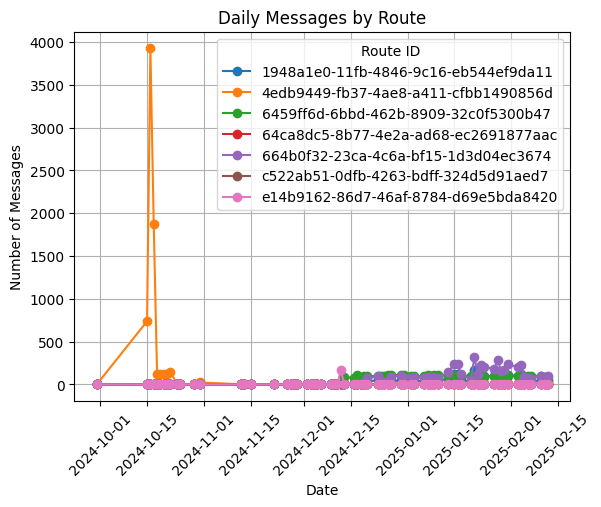

In [90]:
dropped_columns['date']=dropped_columns['received_at'].dt.date
message_counter=dropped_columns.groupby(['date','route_id']).size().unstack(fill_value=0)
message_counter.plot(kind='line', marker='o' )
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.title("Daily Messages by Route")
plt.legend(title="Route ID")
plt.grid(True)
plt.xticks(rotation=45)
plt.show


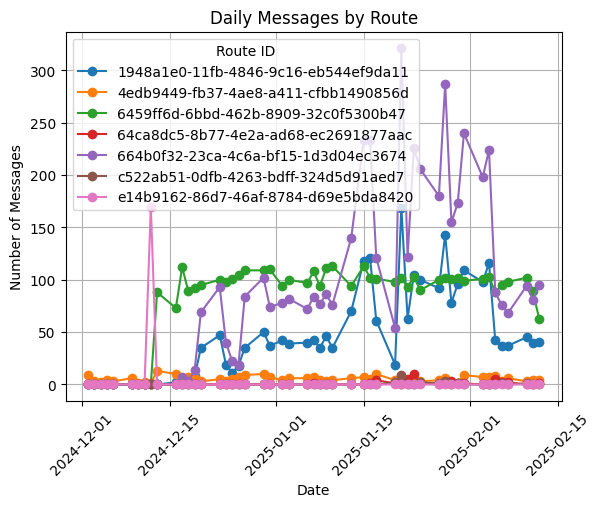

In [155]:
latest_data=dropped_columns[(dropped_columns['received_at']>'2024-12-01')]
message_counter2=latest_data.groupby(['date','route_id']).size().unstack(fill_value=0)
message_counter2.plot(kind='line', marker='o' )
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.title("Daily Messages by Route")
plt.legend(title="Route ID")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


[ 9 10 11 13 14 16 12 15 17 18 19  8  6  7  5  1  2]


C:\Users\y.brahmi\AppData\Local\Temp\ipykernel_32388\1231680332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['hour']=latest_data['received_at'].dt.hour


<function matplotlib.pyplot.show(close=None, block=None)>

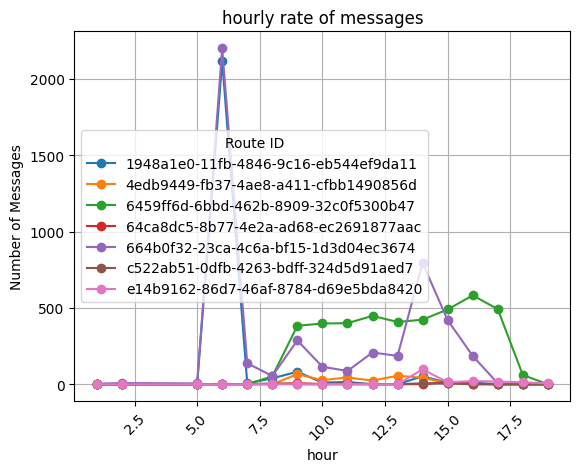

In [156]:
latest_data['hour']=latest_data['received_at'].dt.hour
valeur_des_heures=latest_data['hour'].unique()
print(valeur_des_heures)
#dropped_columns['weekday_hour']=dropped_columns['dayOfWeek'].astype(str)+dropped_columns['hour'].astype(str)
message_counter3=latest_data.groupby(['hour','route_id']).size().unstack(fill_value=0)
message_counter3.plot(kind='line', marker='o' )
plt.xlabel("hour")
plt.ylabel("Number of Messages")
plt.title("hourly rate of messages")
plt.legend(title="Route ID")
plt.grid(True)
plt.xticks(rotation=45)
plt.show

In [157]:
message_counter3.head(24)

route_id,1948a1e0-11fb-4846-9c16-eb544ef9da11,4edb9449-fb37-4ae8-a411-cfbb1490856d,6459ff6d-6bbd-462b-8909-32c0f5300b47,64ca8dc5-8b77-4e2a-ad68-ec2691877aac,664b0f32-23ca-4c6a-bf15-1d3d04ec3674,c522ab51-0dfb-4263-bdff-324d5d91aed7,e14b9162-86d7-46af-8784-d69e5bda8420
hour,,,,,,,
1,0,0,0,0,4,0,0
2,0,0,0,0,8,0,0
5,0,0,0,0,6,0,0
6,2116,0,0,3,2200,0,0
7,6,0,0,0,138,2,0
8,39,0,52,3,54,4,0
9,82,66,383,7,287,1,0
10,11,27,398,2,115,0,0
11,15,45,400,5,87,0,1


C:\Users\y.brahmi\AppData\Local\Temp\ipykernel_32388\881050875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['dayOfWeeko'] = latest_data['dayOfWeek'].astype(cat_type)
C:\Users\y.brahmi\AppData\Local\Temp\ipykernel_32388\881050875.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  message_counter3=latest_data.groupby(['dayOfWeeko','route_id']).size().unstack(fill_value=0)


<function matplotlib.pyplot.show(close=None, block=None)>

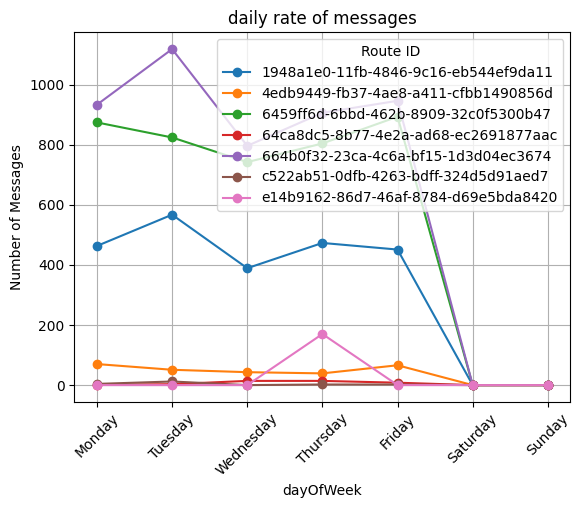

In [158]:


cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
latest_data['dayOfWeeko'] = latest_data['dayOfWeek'].astype(cat_type)
message_counter3=latest_data.groupby(['dayOfWeeko','route_id']).size().unstack(fill_value=0)
message_counter3.plot(kind='line', marker='o' )
plt.xlabel("dayOfWeek")
plt.ylabel("Number of Messages")
plt.title("daily rate of messages")
plt.legend(title="Route ID")
plt.grid(True)
plt.xticks(rotation=45)
plt.show

In [159]:
dropped_columns.head(10)

,id,received_at,status,creation_date,route_id,type,fk_matching_id,dayOfWeek,date,hour,date_hour,dayOfWeeko,date_grouped_by
0,4554dbf2-1e33-44c8-af75-98b51137640c,2024-09-30 15:14:44.263061,TR,2024-09-30 14:14:44.263089,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Monday,2024-09-30,15,2024-09-3015,Monday,2024-09-3015
1,57f49898-34bd-4d76-9119-625e79893453,2024-09-30 15:14:44.407839,TR,2024-09-30 14:14:44.407986,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Monday,2024-09-30,15,2024-09-3015,Monday,2024-09-3015
40,9868f4e4-fffc-45f3-b0b7-098cdc0e64e3,2024-10-15 15:23:50.589702,TR,2024-10-15 14:23:50.589703,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
42,5b6af59b-a3c4-4d8c-bf8e-e54a22185427,2024-10-15 15:24:32.926686,TR,2024-10-15 14:24:32.926688,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
43,09f47b79-290b-4dc1-8509-f65cb508fcfd,2024-10-15 15:25:14.909272,TR,2024-10-15 14:25:14.909273,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
44,841514e6-5316-4a80-82a9-576754737725,2024-10-15 15:25:56.834718,TR,2024-10-15 14:25:56.834718,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
45,208e6de0-f0c7-4abb-b2c9-7ae6ccf08d26,2024-10-15 15:26:38.741013,TR,2024-10-15 14:26:38.741014,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
46,ea3c139a-91b4-4558-9727-f8b40d23953d,2024-10-15 15:27:20.603140,TR,2024-10-15 14:27:20.603141,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
47,ba80bf5f-b38b-44db-b40d-ce632c573202,2024-10-15 15:28:02.559015,TR,2024-10-15 14:28:02.559016,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515
48,7bd6f61b-5e68-4eda-834e-8b11336d6220,2024-10-15 15:28:44.448459,TR,2024-10-15 14:28:44.44846,4edb9449-fb37-4ae8-a411-cfbb1490856d,UNIT,NaN,Tuesday,2024-10-15,15,2024-10-1515,Tuesday,2024-10-1515


In [160]:
test_features=latest_data.groupby(['date','dayOfWeek','hour','route_id']).size()
test_features.to_csv('test_feature.csv')
test_features.shape

(964,)

In [161]:
test_features2=latest_data.groupby(['date','dayOfWeek','hour','route_id']).count()
test_features2.to_csv('test_feature2.csv')
test_features2.shape

(964, 9)

In [162]:
test_features2.columns

Index(['id', 'received_at', 'status', 'creation_date', 'type',
       'fk_matching_id', 'date_hour', 'dayOfWeeko', 'date_grouped_by'],
      dtype='object')

In [163]:
test_features2.head(30)

id  \
date       dayOfWeek hour route_id                                   
2024-12-02 Monday    9    4edb9449-fb37-4ae8-a411-cfbb1490856d   3   
                     10   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     11   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d   2   
                     14   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     16   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-03 Tuesday   9    4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     11   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     12   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-04 Wednesday 9    4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-05 Thursday  9    4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     12   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     14   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-06 Friday    9    4edb9449-fb37-4ae8-a411-cfbb1490856d   2   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-09 Monday    9    4edb9449-fb37-4ae8-a411-cfbb1490856d   2   
                     10   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     11   4edb9449-fb37-4ae8-a411-cfbb1490856d   2   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-10 Tuesday   15   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-11 Wednesday 9    4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                     12   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
2024-12-12 Thursday  11   e14b9162-86d7-46af-8784-d69e5bda8420   1   
                     14   4edb9449-fb37-4ae8-a411-cfbb1490856d   1   
                          e14b9162-86d7-46af-8784-d69e5bda8420  98   
                     15   e14b9162-86d7-46af-8784-d69e5bda8420  13   
                     16   e14b9162-86d7-46af-8784-d69e5bda8420  21   
                     17   e14b9162-86d7-46af-8784-d69e5bda8420  18   

                                                                received_at  \
date       dayOfWeek hour route_id                                            
2024-12-02 Monday    9    4edb9449-fb37-4ae8-a411-cfbb1490856d            3   
                     10   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     11   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d            2   
                     14   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     16   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
2024-12-03 Tuesday   9    4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     11   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     12   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
2024-12-04 Wednesday 9    4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
2024-12-05 Thursday  9    4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     12   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     14   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
2024-12-06 Friday    9    4edb9449-fb37-4ae8-a411-cfbb1490856d            2   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
2024-12-09 Monday    9    4edb9449-fb37-4ae8-a411-cfbb1490856d            2   
                     10   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
                     11   4edb9449-fb37-4ae8-a411-cfbb1490856d            2   
                     13   4edb9449-fb37-4ae8-a411-cfbb1490856d            1   
2024-1

In [164]:
df=pd.read_csv('test_feature.csv')

In [165]:
df.columns

Index(['date', 'dayOfWeek', 'hour', 'route_id', '0'], dtype='object')